In [529]:
import numpy as np
import matplotlib.pyplot as plt

# CLASE 1

### 1) Implementación SGD para resolver XOR

#### Inicializamos parámetros

In [563]:
#Layer 1

W1_1 = np.random.rand(1)
W2_1 = np.random.rand(1)
W3_1 = np.random.rand(1)
W4_1 = np.random.rand(1)
b1_1 = np.random.rand(1)
b1_2 = np.random.rand(1)

#Layer 2

W1_2 = np.random.rand(1)
W2_2 = np.random.rand(1)
b2_1 = np.random.rand(1)

In [564]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [565]:
mse_historic = []

for epochs in range(300):
    errors = []
    
    for i in range(4):
        lr = 0.001
        z1_1 = (X[i,0] * W1_1) + (X[i,1] * W2_1) + b1_1
        z1_2 = (X[i,0] * W3_1) + (X[i,1] * W4_1) + b1_2 
        a_1 = 1 / (1 + np.exp(-z1_1))
        a_2 = 1 / (1 + np.exp(-z1_2))
        yhat = (a_1 * W1_2) + (a_2 * W2_2) + b2_1
        #definir el error
        error = (yhat - y[i])**2
        #calcular derivada
        dc = 2 * (yhat - y[i])
        dz_a1 = W1_2
        dz_a2 = W2_2
        da1 = np.exp(-z1_1)/(( np.exp(-z1_1) +1)**2)
        da2 = np.exp(-z1_2)/(( np.exp(-z1_2) +1)**2)
        dw1_1 = dc * dz_a1 * da1 * X[i,0]
        dw2_1 = dc * dz_a1 * da1 * X[i,1]
        dw3_1 = dc * dz_a2 * da2 * X[i,0]
        dw4_1 = dc * dz_a2 * da2 * X[i,1]
        db1_1 = dc * dz_a1 * da1
        db1_2 = dc * dz_a2 * da2
        dw1_2 = dc * a_1
        dw2_2 = dc * a_2
        db2_1 = dc
        
        #actualizar parámetros
        W1_1 = W1_1 - (lr * dw1_1)
        W2_1 = W2_1 - (lr * dw2_1)
        W3_1 = W3_1 - (lr * dw3_1)
        W4_1 = W4_1 - (lr * dw4_1)
        b1_1 = b1_1 - (lr * db1_1)
        b1_2 = b1_2 - (lr * db1_2)
        W1_2 = W1_2 - (lr * dw1_2)
        W2_2 = W2_2 - (lr * dw2_2)
        b2_1 = b2_1 - (lr * db2_1)
        
        errors.append(error)
        
    mse = 1/4 * (np.sum(error))
    mse_historic.append(mse)
    if(epochs % 20 == 0):
        print(f"mse on epoch {epochs} is {mse:5.3f}")
        


mse on epoch 0 is 0.363
mse on epoch 20 is 0.255
mse on epoch 40 is 0.189
mse on epoch 60 is 0.149
mse on epoch 80 is 0.123
mse on epoch 100 is 0.106
mse on epoch 120 is 0.094
mse on epoch 140 is 0.087
mse on epoch 160 is 0.081
mse on epoch 180 is 0.078
mse on epoch 200 is 0.075
mse on epoch 220 is 0.073
mse on epoch 240 is 0.072
mse on epoch 260 is 0.071
mse on epoch 280 is 0.070


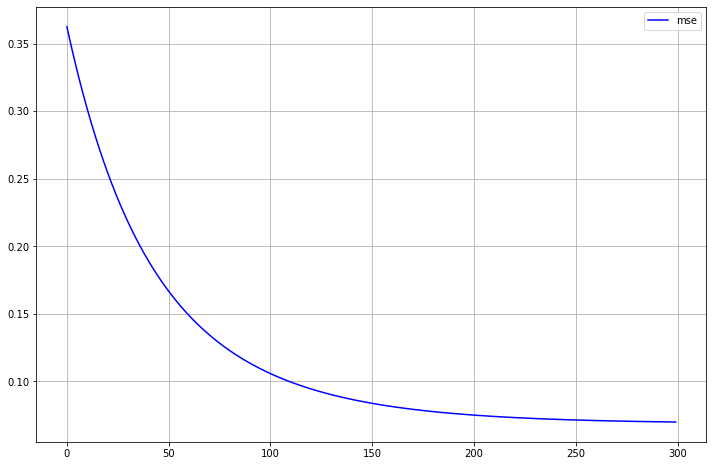

In [566]:
plt.figure(figsize=(12,8))
plt.plot(mse_historic, color='blue', label='mse')
plt.grid(True)
plt.legend()
plt.show()

b)El modelo tiene 9 parámetros desconocidos: 4 pesos y dos bias en la primera capa + 2 pesos y un bias en la segunda. 

c) Los hiperparámetros del modelos son: los epochs y el learning rate. 

Cuando se cambia el lr hacia un valor grande como 0.1, converge más rápido a un mínimo local pero se estanca en él. Cuando lo ponemos en un valor muy muy pequeño, le cuesta converger a algún mínimo, en ese caso toca compensar con más epochs. En este modelo me resultó muy bien el lr = 0.001 con 200 epochs. 

d) Predicción

In [567]:
X_test = np.array([[0,1],[0,0],[1,1],[0,1]])
y_test = np.array([[1],[0],[0],[1]])

Parámetros que obtenemos del modelo

In [568]:
print(W1_1)
print(W2_1)
print(W3_1)
print(W4_1)
print(b1_1)
print(b1_2)
print(W1_2)
print(W2_2)
print(b2_1)     

[0.54358904]
[0.72367575]
[0.26194904]
[0.37148877]
[0.80851675]
[0.39834868]
[0.14009868]
[0.12097755]
[0.3123862]


In [569]:
for i in range(4):
    z1_1 = (X[i,0] * W1_1) + (X[i,1] * W2_1) + b1_1
    z1_2 = (X[i,0] * W3_1) + (X[i,1] * W4_1) + b1_2 
    a_1 = 1 / (1 + np.exp(-z1_1))
    a_2 = 1 / (1 + np.exp(-z1_2))
    yhat = (a_1 * W1_2) + (a_2 * W2_2) + b2_1
    error = (yhat - y[i])**2
    print("Predicción:", yhat)
    print("error", error)

mse = 1/4 * (np.sum(error))
print("mse:" , mse)

Predicción: [0.4816853]
error [0.23202072]
Predicción: [0.51027954]
error [0.23982613]
Predicción: [0.50345471]
error [0.24655722]
Predicción: [0.52605981]
error [0.27673892]
mse: 0.06918473052703387
